# Support Vector Machines 



## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**Overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**Unique values**

In [5]:
df.quality.value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

**A countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

<AxesSubplot:xlabel='quality', ylabel='count'>

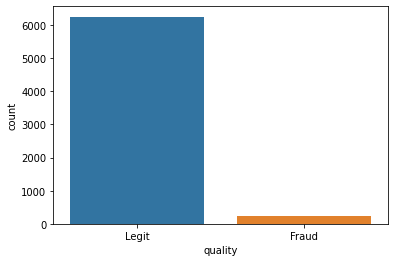

In [6]:
sns.countplot(data=df,x='quality')

**Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<AxesSubplot:xlabel='type', ylabel='count'>

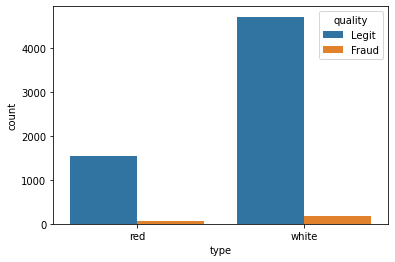

In [7]:
sns.countplot(data=df,hue='quality',x='type')

**What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [8]:
red_wine=df[df.type=='red']
white_wine=df[df.type=='white']

In [9]:
#Percentage of fraud in Red Wines:
100*(len(red_wine[red_wine.quality=='Fraud'])/len(red_wine))

3.9399624765478425

In [10]:
100*(len(white_wine[white_wine.quality=='Fraud'])/len(white_wine))

3.7362188648427925

**The correlation between the various features and the "quality" column. To do this we need to map the column to 0 and 1 instead of a string.**

In [11]:
df['Fraud']=df.quality.map({'Legit':0,'Fraud':1})

In [12]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**A bar plot of the correlation values to Fraudlent wine.**

<AxesSubplot:>

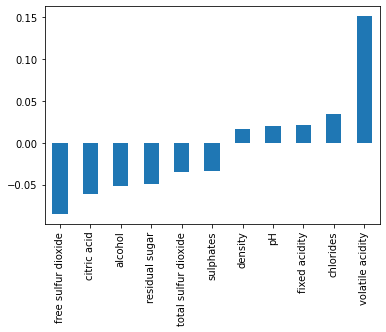

In [13]:
df.corr()['Fraud'].sort_values()[: -1].plot(kind='bar')

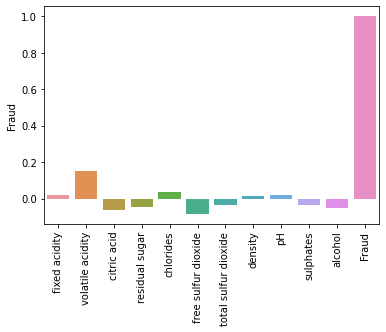

In [14]:
sns.barplot(x=df.corr()['Fraud'].index,y=df.corr()['Fraud'][:])
plt.xticks(rotation=90);

**A clustermap with seaborn to explore the relationships between variables.**

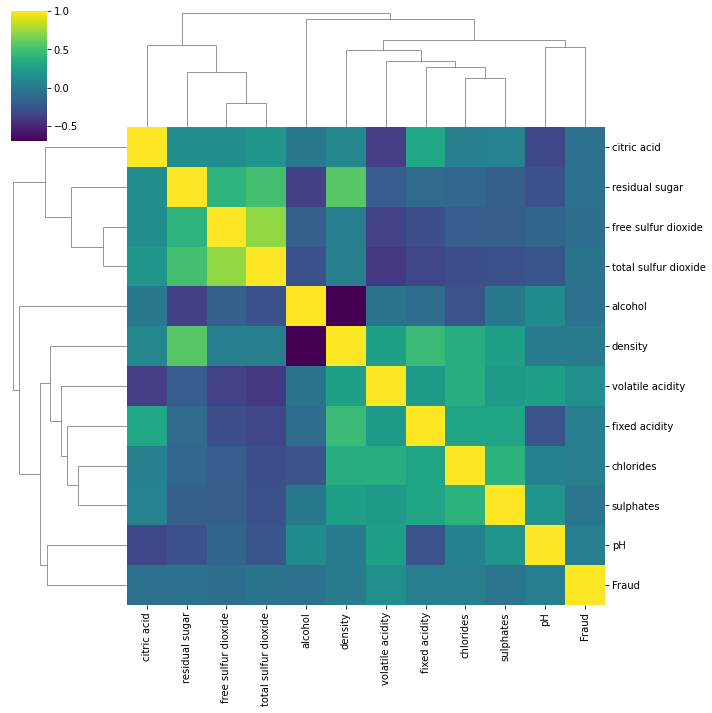

In [15]:
sns.clustermap(df.corr(),cmap='viridis')

----
## Machine Learning Model

**Converting the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [16]:
df.select_dtypes(include=object)

,quality,type
0,Legit,red
1,Legit,red
2,Legit,red
3,Legit,red
4,Legit,red
...,...,...
6492,Legit,white
6493,Legit,white
6494,Legit,white
6495,Legit,white


In [17]:
df.type=pd.get_dummies(df.type,drop_first=True)

**Separating out the data into X features and y target label ("quality" column)**

In [18]:
df=df.drop('Fraud',axis=1)

In [19]:
X=df.drop('quality',axis=1)
y=df.quality

**A Train|Test split on the data, with a 10% test size.**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)


**TASK: Scale the X train and X test data.**

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

**We already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)**

In [25]:
from sklearn.svm import SVC

In [26]:
svm_cf=SVC(class_weight='balanced')

**GridSearchCV**

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}

In [29]:
model_cf=GridSearchCV(svm_cf,param_grid)

In [30]:
model_cf.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [31]:
model_cf.best_params_

{'C': 1, 'gamma': 'auto'}

**The confusion matrix and classification report**

In [32]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [33]:
y_pred=model_cf.predict(scaled_X_test)

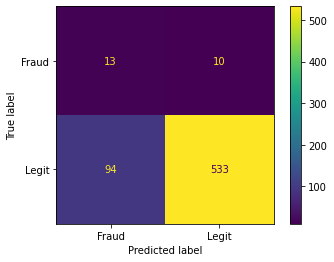

In [34]:
plot_confusion_matrix(model_cf,scaled_X_test,y_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.12      0.57      0.20        23
       Legit       0.98      0.85      0.91       627

    accuracy                           0.84       650
   macro avg       0.55      0.71      0.56       650
weighted avg       0.95      0.84      0.89       650



Finally, think about how well this model performed, would you suggest using it? Realistically will this work?**

In [36]:
# ANSWER: This is the first step to classify wines but chemical analysis of wines is the true metric to detect the frauds.

***